In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, auc

from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

import joblib

%matplotlib inline
pd.set_option('display.max_columns', 100)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be importe

# TELCOM CHURN PREDICTION | Model Optimizing

Goals: This project's aim is to predict whether the customer left the telecommunication services or continues to be a customer.<br>
[Datasets Source](https://www.kaggle.com/blastchar/telco-customer-churn)

## 1. Import Data

In [2]:
df = pd.read_csv("Telcom_Cleaned.csv")
df

,Female,Male,DSL,FiberOptic,NoIntServ,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1.009559,-1.009559,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-1.160323,-0.994194,0
1,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.796070,-1.205113,-0.259629,-0.173740,0
2,-0.990532,0.990532,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-0.362660,-0.959649,1
3,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.796070,-1.205113,-0.746535,-0.195248,0
4,1.009559,-1.009559,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.197365,-0.940457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.170719,1.577454,-0.725563,1.381277,1.563872,1.265612,1.256171,0.829798,0.665992,-0.129180,0
7028,1.009559,-1.009559,-0.723740,1.129102,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,1.904590,-0.711026,-0.544807,-0.439916,1.034530,1.529024,1.613701,0.327438,1.170719,-0.633933,1.378241,1.381277,-0.639439,1.265612,1.256171,0.829798,1.277533,2.241056,0
7029,1.009559,-1.009559,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,1.034530,1.529024,-0.870241,-3.054010,-0.854176,1.577454,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-1.168632,-0.854514,0
7030,-0.990532,0.990532,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.170719,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.320338,-0.872095,1


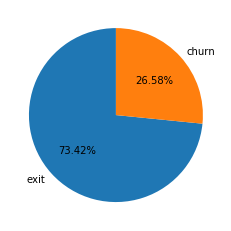

In [3]:
piedata = [len(df[df['Churn']==0]), len(df[df['Churn']==1])]
labels = ['exit', 'churn']

plt.pie(piedata, labels=labels, autopct='%2.2f%%', startangle=90)
plt.show()

## 2. Checking Best Correlation

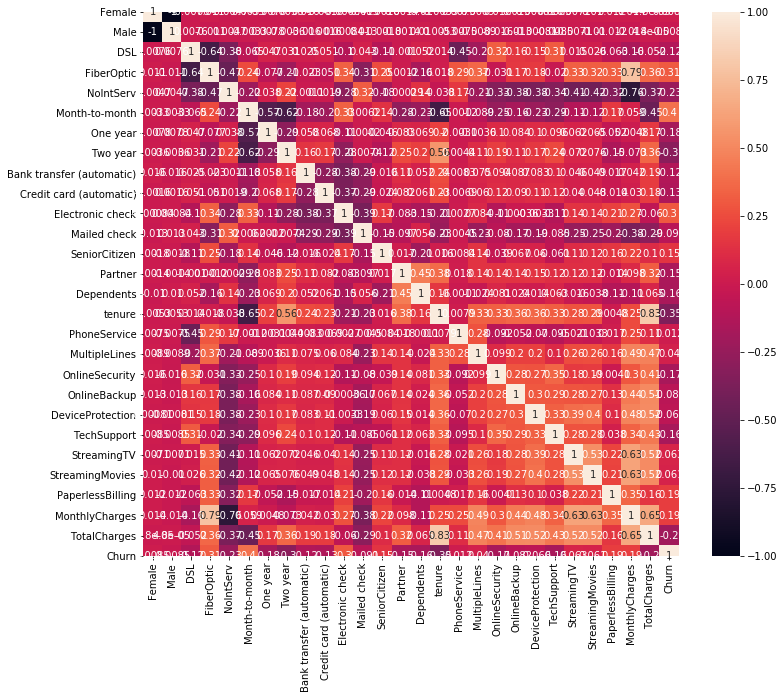

In [4]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [5]:
df.corr()['Churn'].sort_values(ascending=False)

Churn                        1.000000
Month-to-month               0.404565
FiberOptic                   0.307463
Electronic check             0.301455
MonthlyCharges               0.192858
PaperlessBilling             0.191454
SeniorCitizen                0.150541
StreamingTV                  0.063254
StreamingMovies              0.060860
MultipleLines                0.040033
PhoneService                 0.011691
Female                       0.008545
Male                        -0.008545
DeviceProtection            -0.066193
OnlineBackup                -0.082307
Mailed check                -0.090773
Bank transfer (automatic)   -0.118136
DSL                         -0.124141
Credit card (automatic)     -0.134687
Partner                     -0.149982
Dependents                  -0.163128
TechSupport                 -0.164716
OnlineSecurity              -0.171270
One year                    -0.178225
TotalCharges                -0.199484
NoIntServ                   -0.227578
Two year    

Features that have big correlation:
* Month-to-month [Contract] (40.45%)
* Tenure (35.40%)
* FiberOptic [InternetServices] (30.74%)
* Two year [Contract] (30.15%)
* Electronic check [PaymentMethod] (30.14%)
* NoIntServ [InternetServices] (22.75%)

## 3. Splitting Data

In [6]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [8]:
y_train.value_counts()

0    3614
1    1308
Name: Churn, dtype: int64

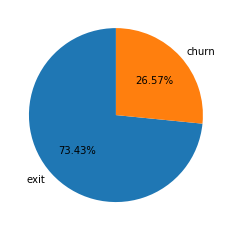

In [9]:
piedata = [len(y_train[y_train==0]), len(y_train[y_train==1])]
labels = ['exit', 'churn']

plt.pie(piedata, labels=labels, autopct='%2.2f%%', startangle=90)
plt.show()

We can see that `churn` and `exit` data is not balance, so I consider to use SMOTE.

## 4. SMOTE

In [10]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



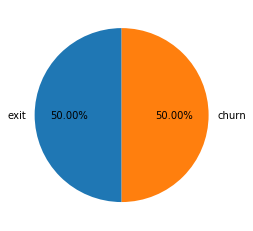

In [11]:
piedata = [len(y_sm[y_sm==0]), len(y_sm[y_sm==1])]
labels = ['exit', 'churn']

plt.pie(piedata, labels=labels, autopct='%2.2f%%', startangle=90)
plt.show()

Now, we have balance data. So, let's get to started to train with the model! :)

## 5. Model Building

For optimizing the result, I am using `hyperparameter tuning` by creating function to deciding the best parameter score when building the model. Also, I am using `non-SMOTE` when training the model to compare the result for deciding which one is the best.

### 5.1. Logistic Regression

#### 5.1.1. Non-SMOTE

In [12]:
lr = LogisticRegression()

In [13]:
lr_params = {
    'C': [0.1, 0.5, 0.9, 1, 2, 5],
    'penalty':['l1','l2'],
    'random_state':[24,32,56,65]
}
logreg_random = RandomizedSearchCV(estimator= lr,
                              param_distributions= lr_params,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
logreg_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 0.9, 1, 2, 5],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [24, 32, 56, 65]},
                   scoring='roc_auc')

In [14]:
logreg_random.best_params_

{'random_state': 32, 'penalty': 'l2', 'C': 5}

In [15]:
logreg_random.best_estimator_.score(X_test, y_test)

0.7943127962085308

In [16]:
best_lr = logreg_random.best_estimator_

predict_lr = best_lr.predict(X_test)
proba_lr = best_lr.predict_proba(X_test)
print(classification_report(y_test, predict_lr))
print(confusion_matrix(y_test, predict_lr))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.53      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110

[[1376  173]
 [ 261  300]]


#### 5.1.2. SMOTE

In [17]:
lrsm_random = RandomizedSearchCV(estimator= lr,
                              param_distributions= lr_params,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
lrsm_random.fit(X_sm, y_sm)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 0.9, 1, 2, 5],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [24, 32, 56, 65]},
                   scoring='roc_auc')

In [18]:
lrsm_random.best_params_

{'random_state': 32, 'penalty': 'l2', 'C': 5}

In [19]:
lrsm_random.best_estimator_.score(X_test, y_test)

0.747867298578199

In [20]:
best_lrsm = lrsm_random.best_estimator_

predict_lrsm = best_lrsm.predict(X_test)
proba_lrsm = best_lrsm.predict_proba(X_test)
print(classification_report(y_test, predict_lrsm))
print(confusion_matrix(y_test, predict_lrsm))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110

[[1126  423]
 [ 109  452]]


### 5.2. K-Nearest Neighbour

#### 5.2.1. Non-SMOTE

In [21]:
knn = KNeighborsClassifier()

In [22]:
k = round(X_train.shape[0] ** .5)
if k % 2 == 0:
    k+=1
    
n_neighbors = list(range(k-5, k+5))
algo = ["ball_tree", "kd_tree", "brute", "auto"]

paramKNN = {
    "n_neighbors": n_neighbors,
    "algorithm": algo,
    "leaf_size" : [30],
    "metric" : ['minkowski'],
    "metric_params" : [None],
    "n_jobs" : [None],
    "p": [2], "weights" : ["uniform"]
}

knn_random = RandomizedSearchCV(estimator= knn, param_distributions= paramKNN, cv= 5, scoring='roc_auc')
knn_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute', 'auto'],
                                        'leaf_size': [30],
                                        'metric': ['minkowski'],
                                        'metric_params': [None],
                                        'n_jobs': [None],
                                        'n_neighbors': [66, 67, 68, 69, 70, 71,
                                                        72, 73, 74, 75],
                                        'p': [2], 'weights': ['uniform']},
                   scoring='roc_auc')

In [23]:
knn_random.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 70,
 'n_jobs': None,
 'metric_params': None,
 'metric': 'minkowski',
 'leaf_size': 30,
 'algorithm': 'kd_tree'}

In [24]:
knn_random.best_estimator_.score(X_test, y_test)

0.7872037914691943

In [25]:
best_knn = knn_random.best_estimator_

predict_knn = best_knn.predict(X_test)
proba_knn = best_knn.predict_proba(X_test)
print(classification_report(y_test, predict_knn))
print(confusion_matrix(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1549
           1       0.60      0.59      0.60       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.73      2110
weighted avg       0.79      0.79      0.79      2110

[[1331  218]
 [ 231  330]]


#### 5.2.2. SMOTE

In [26]:
knnsm_random = RandomizedSearchCV(estimator= knn, param_distributions= paramKNN, cv= 5, scoring='roc_auc')
knnsm_random.fit(X_sm, y_sm)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute', 'auto'],
                                        'leaf_size': [30],
                                        'metric': ['minkowski'],
                                        'metric_params': [None],
                                        'n_jobs': [None],
                                        'n_neighbors': [66, 67, 68, 69, 70, 71,
                                                        72, 73, 74, 75],
                                        'p': [2], 'weights': ['uniform']},
                   scoring='roc_auc')

In [27]:
knnsm_random.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 66,
 'n_jobs': None,
 'metric_params': None,
 'metric': 'minkowski',
 'leaf_size': 30,
 'algorithm': 'brute'}

In [28]:
knnsm_random.best_estimator_.score(X_test, y_test)

0.6881516587677725

In [29]:
best_knnsm = knnsm_random.best_estimator_

predict_knnsm = best_knnsm.predict(X_test)
proba_knnsm = best_knnsm.predict_proba(X_test)
print(classification_report(y_test, predict_knnsm))
print(confusion_matrix(y_test, predict_knnsm))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75      1549
           1       0.45      0.84      0.59       561

    accuracy                           0.69      2110
   macro avg       0.69      0.74      0.67      2110
weighted avg       0.79      0.69      0.71      2110

[[979 570]
 [ 88 473]]


### 5.3. Decision Tree Classifier

#### 5.3.1. Non-SMOTE

In [30]:
dtr = DecisionTreeClassifier()

In [31]:
dtr_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,20,30,40],
    'min_samples_split': [4,5,6,7,8,9],
    'max_features': ['auto', 'sqrt', 'log2']
}
dtr_random = RandomizedSearchCV(estimator= dtr,
                              param_distributions= dtr_params,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
dtr_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [4, 5, 6, 7, 8,
                                                              9]},
                   scoring='roc_auc')

In [32]:
dtr_random.best_params_

{'min_samples_split': 4,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'entropy'}

In [33]:
dtr_random.best_estimator_.score(X_test, y_test)

0.7791469194312797

In [34]:
best_dtr = dtr_random.best_estimator_

predict_dtr = best_dtr.predict(X_test)
proba_dtr = best_dtr.predict_proba(X_test)
print(classification_report(y_test, predict_dtr))
print(confusion_matrix(y_test, predict_dtr))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1549
           1       0.59      0.54      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110

[[1343  206]
 [ 260  301]]


#### 5.3.2. SMOTE

In [35]:
dtrsm_random = RandomizedSearchCV(estimator= dtr,
                              param_distributions= dtr_params,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
dtrsm_random.fit(X_sm, y_sm)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [4, 5, 6, 7, 8,
                                                              9]},
                   scoring='roc_auc')

In [36]:
dtrsm_random.best_params_

{'min_samples_split': 6,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [37]:
dtrsm_random.best_estimator_.score(X_test, y_test)

0.7293838862559242

In [38]:
best_dtrsm = dtrsm_random.best_estimator_

predict_dtrsm = best_dtrsm.predict(X_test)
proba_dtrsm = best_dtrsm.predict_proba(X_test)
print(classification_report(y_test, predict_dtrsm))
print(confusion_matrix(y_test, predict_dtrsm))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1549
           1       0.49      0.74      0.59       561

    accuracy                           0.73      2110
   macro avg       0.69      0.73      0.69      2110
weighted avg       0.78      0.73      0.74      2110

[[1125  424]
 [ 147  414]]


### 5.4. Comparing The Score

#### 5.4.1. Non-SMOTE

In [39]:
scores = []
for model in [best_lr, best_knn, best_dtr]:
    scores.append(model.score(X_test, y_test))

scores_df = pd.DataFrame({'model': ['Logistic Regression', 'K-Nearest Neighbour', 'Decision Tree'], 'scores': scores})
scores_df

,model,scores
0,Logistic Regression,0.794313
1,K-Nearest Neighbour,0.787204
2,Decision Tree,0.779147


#### 5.4.2. SMOTE

In [40]:
scores = []
for model in [best_lrsm, best_knnsm, best_dtrsm]:
    scores.append(model.score(X_sm, y_sm))

scores_df = pd.DataFrame({'model': ['Logistic Regression', 'K-Nearest Neighbour', 'Decision Tree'], 'scores': scores})
scores_df

,model,scores
0,Logistic Regression,0.779192
1,K-Nearest Neighbour,0.770891
2,Decision Tree,0.838683


## 6. Evaluation Metrics

### Logistic Regression

#### >> Non-SMOTE

In [41]:
predict_lr = best_lr.predict(X_test)
proba_lr = best_lr.predict_proba(X_test)
print(classification_report(y_test, predict_lr))
print(confusion_matrix(y_test, predict_lr))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.53      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110

[[1376  173]
 [ 261  300]]


#### >> SMOTE

In [42]:
predict_lrsm = best_lrsm.predict(X_test)
proba_lrsm = best_lrsm.predict_proba(X_test)
print(classification_report(y_test, predict_lrsm))
print(confusion_matrix(y_test, predict_lrsm))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110

[[1126  423]
 [ 109  452]]


### K-Nearest Neighbour

#### >> Non-SMOTE

In [43]:
predict_knn = best_knn.predict(X_test)
proba_knn = best_knn.predict_proba(X_test)
print(classification_report(y_test, predict_knn))
print(confusion_matrix(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1549
           1       0.60      0.59      0.60       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.73      2110
weighted avg       0.79      0.79      0.79      2110

[[1331  218]
 [ 231  330]]


#### >> SMOTE

In [44]:
predict_knnsm = best_knnsm.predict(X_test)
proba_knnsm = best_knnsm.predict_proba(X_test)
print(classification_report(y_test, predict_knnsm))
print(confusion_matrix(y_test, predict_knnsm))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75      1549
           1       0.45      0.84      0.59       561

    accuracy                           0.69      2110
   macro avg       0.69      0.74      0.67      2110
weighted avg       0.79      0.69      0.71      2110

[[979 570]
 [ 88 473]]


### Decision Tree

#### >> Non-SMOTE

In [45]:
predict_dtr = best_dtr.predict(X_test)
proba_dtr = best_dtr.predict_proba(X_test)
print(classification_report(y_test, predict_dtr))
print(confusion_matrix(y_test, predict_dtr))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1549
           1       0.59      0.54      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110

[[1343  206]
 [ 260  301]]


#### >> SMOTE

In [46]:
predict_dtrsm = best_dtrsm.predict(X_test)
proba_dtrsm = best_dtrsm.predict_proba(X_test)
print(classification_report(y_test, predict_dtrsm))
print(confusion_matrix(y_test, predict_dtrsm))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1549
           1       0.49      0.74      0.59       561

    accuracy                           0.73      2110
   macro avg       0.69      0.73      0.69      2110
weighted avg       0.78      0.73      0.74      2110

[[1125  424]
 [ 147  414]]


### Plot Visualization of Models

#### >> Non-SMOTE

In [47]:
prob1_lr = proba_lr[:,1]
fpr_lr, tpr_lr, thres_lr = roc_curve(y_test, prob1_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

prob1_dtr = proba_dtr[:,1]
fpr_dtr, tpr_dtr, thres_dtr = roc_curve(y_test, prob1_dtr)
roc_auc_dtr = auc(fpr_dtr, tpr_dtr)

prob1_knn = proba_knn[:,1]
fpr_knn, tpr_knn, thres_knn = roc_curve(y_test, prob1_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

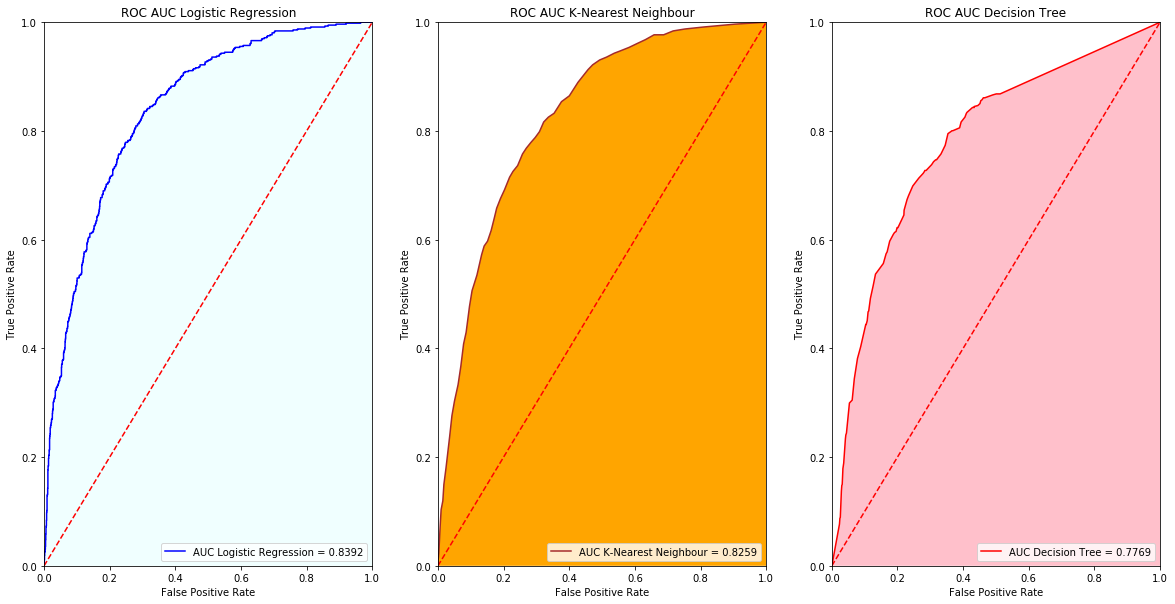

In [48]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title('ROC AUC Logistic Regression')
plt.plot(fpr_lr, tpr_lr, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_lr,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_lr,tpr_lr, 0, facecolor='azure', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(132)
plt.title('ROC AUC K-Nearest Neighbour')
plt.plot(fpr_knn, tpr_knn, 'brown', label='AUC K-Nearest Neighbour = {}'.format(round(roc_auc_knn,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_knn,tpr_knn, 0, facecolor='orange', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(133)
plt.title('ROC AUC Decision Tree')
plt.plot(fpr_dtr, tpr_dtr, 'red', label='AUC Decision Tree = {}'.format(round(roc_auc_dtr,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtr,tpr_dtr, 0, facecolor='pink', alpha=1)
plt.legend(loc = 'lower right')

#### >> SMOTE

In [49]:
prob1_lrsm = proba_lrsm[:,1]
fpr_lrsm, tpr_lrsm, thres_lrsm = roc_curve(y_test, prob1_lrsm)
roc_auc_lrsm = auc(fpr_lrsm, tpr_lrsm)

prob1_dtrsm = proba_dtrsm[:,1]
fpr_dtrsm, tpr_dtrsm, thres_dtrsm = roc_curve(y_test, prob1_dtrsm)
roc_auc_dtrsm = auc(fpr_dtrsm, tpr_dtrsm)

prob1_knnsm = proba_knnsm[:,1]
fpr_knnsm, tpr_knnsm, thres_knnsm = roc_curve(y_test, prob1_knnsm)
roc_auc_knnsm = auc(fpr_knnsm, tpr_knnsm)

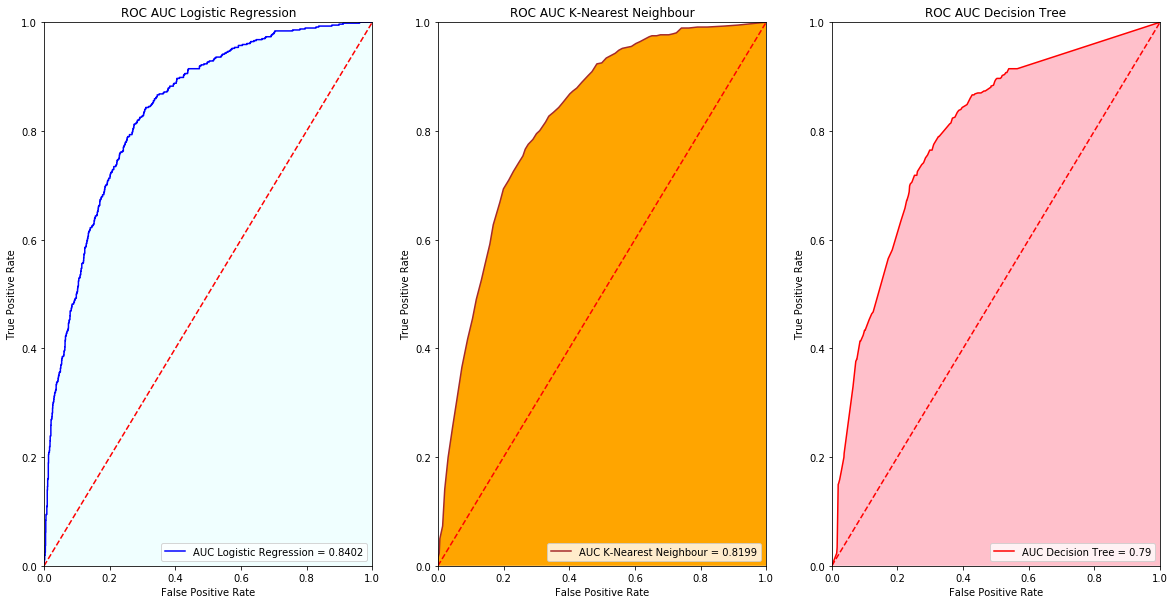

In [50]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title('ROC AUC Logistic Regression')
plt.plot(fpr_lrsm, tpr_lrsm, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_lrsm,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_lrsm,tpr_lrsm, 0, facecolor='azure', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(132)
plt.title('ROC AUC K-Nearest Neighbour')
plt.plot(fpr_knnsm, tpr_knnsm, 'brown', label='AUC K-Nearest Neighbour = {}'.format(round(roc_auc_knnsm,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_knnsm,tpr_knnsm, 0, facecolor='orange', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(133)
plt.title('ROC AUC Decision Tree')
plt.plot(fpr_dtrsm, tpr_dtrsm, 'red', label='AUC Decision Tree = {}'.format(round(roc_auc_dtrsm,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtrsm,tpr_dtrsm, 0, facecolor='pink', alpha=1)
plt.legend(loc = 'lower right')

In [51]:
lr_rand = logreg_random.best_estimator_

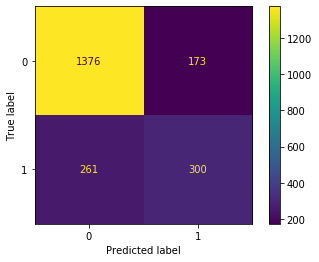

In [52]:
print(plot_confusion_matrix(lr_rand, X_test, y_test))

From the results above, we can conclude that:
* Logistic Regression is the best estimator than other models as it have the highest AUC score (0.84) both on SMOTE or non-SMOTE.
* If the company would like to doing promotion, they have to more focuse to FP (False Positive) since it has the lowest score means that this is the best score than others. We don't want to lose the opportunity to get the customer who keep to stay when giving the promotion.

In [53]:
joblib.dump(best_lr, "model")

['model']